In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from keras.applications.inception_v3 import InceptionV3
#from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

#keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [2]:
%load_ext autoreload
%autoreload 2

## Load Inception v3 and try stuff

In [4]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 27s 0us/step


In [100]:
base_model.layers_by_depth[1] #depth from final layer; depth 156 is input layer

In [101]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

### Get output features from Inception v3, and inspect

In [5]:
#Get output features
x = base_model.output

In [6]:
type(x)

tensorflow.python.framework.ops.Tensor

In [7]:
x.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(2048)])

In [13]:
GlobalAveragePooling2D()(x).shape

TensorShape([Dimension(None), Dimension(2048)])

In [16]:
base_model.input.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [49]:
!ls tree_photos/

acer macrophylum      geckodriver.log       scrape_trees.ipynb
bad_images            platanus acerifolia
bigleaf maple         pseudotsuga menziesii


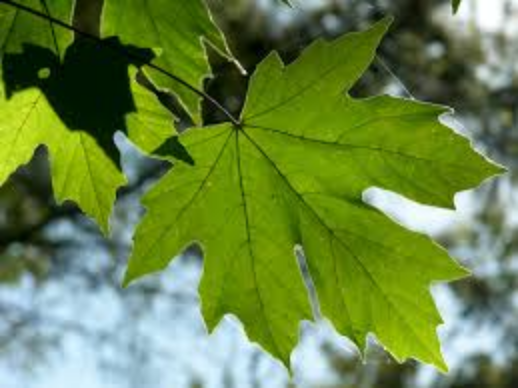

In [95]:
img_path = "tree_photos/acer macrophylum/image_acer macrophylum_1.png"
img = image.load_img(img_path)
img

In [58]:
#Same picture...arrgh!
#image.load_img("tree_photos/bigleaf maple/image_bigleaf maple_0.png")

In [96]:
x0 = image.img_to_array(img)
x0.shape

(388, 518, 3)

In [97]:
np.expand_dims(x0, axis=0).shape

(1, 388, 518, 3)

In [98]:
y0 = base_model.predict(np.expand_dims(x0, axis=0))
y0.shape

(1, 10, 14, 2048)

In [67]:
out = base_model.output
out = GlobalAveragePooling2D()(out)
model = Model(inputs=base_model.input, outputs=out)

y0_pooled = model.predict(np.expand_dims(x0, axis=0))
y0_pooled.shape

(1, 2048)

In [68]:
y0_pooled

array([[ 7.71542692,  0.68367988,  7.50424719, ...,  0.        ,
         0.        ,  2.92667913]], dtype=float32)

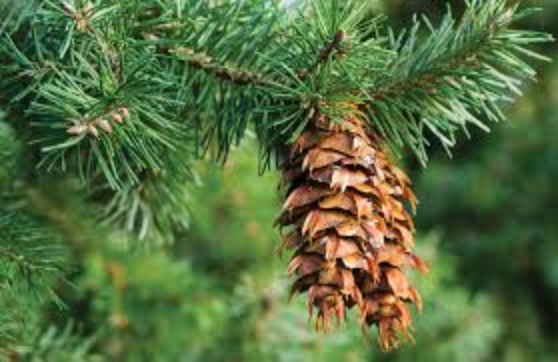

In [91]:
img1 = image.load_img("tree_photos/pseudotsuga menziesii/image_pseudotsuga menziesii_0.png")
img1

In [87]:
x1 = image.img_to_array(img1)
x1.shape

(362, 558, 3)

In [94]:
%%timeit
y1 = base_model.predict(np.expand_dims(x1, axis=0))
y1.shape

952 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
y1_pooled = model.predict(np.expand_dims(x1, axis=0))
y1_pooled.shape

(1, 2048)

In [73]:
import imagehash

In [83]:
str(imagehash.phash(img))

'8afd360b780147bd'

In [64]:
def image_to_input_array(img_path, target_size=None, interpolation='bilinear'):
    '''
    Reads in one image from a file, and converts it to a 4-tensor to input into the model.
    
    INPUT: (string) path of image file
    OUTPUT: (numpy array) 4-tensor of shape (1, img_height, img_width, channels), where channels=3 for RGB  
    '''
    img = image.load_img(img_path, target_size, interpolation)
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0) #add one dimension because we need a 4-tensor

def images_to_input_array(img_paths, target_size=None, interpolation='bilinear'):
    '''
    Reads in several images given their filenames, converts each one to a 3-tensor,
    and puts these image tensors into a numpy array (now a 4-tensor) suitible to input
    into the model.
    
    If the images are of different dimensions, target_size must be specified in order to
    explicitly convert them all to the same shape, or else numpy will throw an error.
    
    INPUT: (list of strings) list of paths to image files
    OUTPUT: (numpy array) 4-tensor of shape (len(img_paths), img_height, img_width, channels),
        where channels=3 for RGB 
    '''
    return np.array([image.img_to_array(
        image.load_img(img_path, target_size, interpolation))
                     for img in img_path in img_paths])

## Try creating a few different models to identify 4 classes based on Inception v3

### Model 1: Do logistic regression on output features

In [ ]:
#Create a logistic layer
log_predictions = Dense(4, activation='softmax')(x)

log_model = Model(inputs=base_model.input, outputs=log_predictions)

### Model 2: Add a hidden fully connected layer before doing logistic regression

In [ ]:
# let's add a fully-connected layer
x = Dense(100, activation='relu')(x)
# and a logistic layer -- let's say we have 4 classes
predictions = Dense(200, activation='softmax')(x)